In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [62]:
spray = pd.DataFrame(pd.read_excel('Spray.xlsx'))
spray_base = np.full((len(spray["Time for Work"]), 1), np.mean(spray["Time for Work"]))
spray = pd.DataFrame({"Area":spray['Area '], "Tank/Spray/AWL":spray["Tank, Spray, or Awl Grip"], "Task":spray["TASK"], \
                     "SQFT":spray["SQFT"], "Time":spray["Time for Work"],'UPR':spray['Unadjusted Production Rate']})

In [5]:
# Ind Variables: Area, Tank/Spray/AWL, Task, SQFT
# Dep Var: Time for Work

for i, string in enumerate(spray['Area']):
    if 'UWH' in string:
        spray['Area'][i] = "UWH"
    elif 'FB' in string:
        spray['Area'][i] = "FB"
    elif 'Mast' in string:
        spray['Area'][i] = "Mast"

C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


 Train RMSE: 17.71
 Test RMSE: 30.33
Train Variance score: 0.00
Test Variance score: -0.10


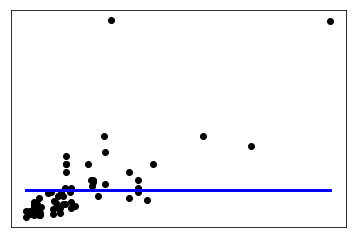

In [8]:
# Compared to baseline model (MEAN AS BASELINE)

X = spray['SQFT']
Y = spray['Time']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
y_pred_train = np.full((len(Y_train), 1), np.mean(Y_train))
y_pred_test =  np.full((len(Y_test), 1), np.mean(Y_train))
# RMSE Train
print(" Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_train, y_pred_train)))

# RMSE Test
print(" Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

# Variances
print('Train Variance score: %.2f' % r2_score(Y_train, y_pred_train))
print('Test Variance score: %.2f' % r2_score(Y_test, y_pred_test))

#Plot training output
plt.scatter(X_train, Y_train, color= 'black')
plt.plot(X_train, y_pred_train, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()


 Train RMSE: 21.17
 Test RMSE: 26.09
Train Variance score: -0.11
Test Variance score: -0.28


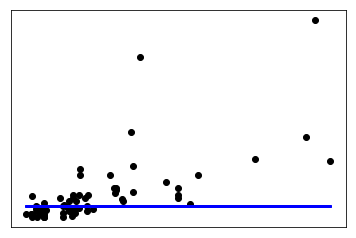

In [7]:
# Compared to baseline model (MEDIAN AS BASELINE)

X = spray['SQFT']
Y = spray['Time']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
y_pred_train = np.full((len(Y_train), 1), np.median(Y_train))
y_pred_test =  np.full((len(Y_test), 1), np.median(Y_train))
# RMSE Train
print(" Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_train, y_pred_train)))

# RMSE Test
print(" Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

# Variances
print('Train Variance score: %.2f' % r2_score(Y_train, y_pred_train))
print('Test Variance score: %.2f' % r2_score(Y_test, y_pred_test))


Coefficients: 
 [0.00211189]
 Train RMSE: 15.09
 Test RMSE: 8.93
Train Variance score: 0.53
Test Variance score: 0.65


C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


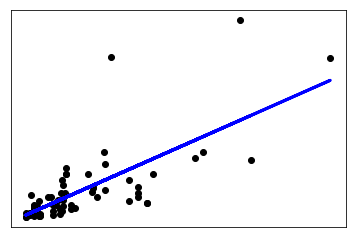

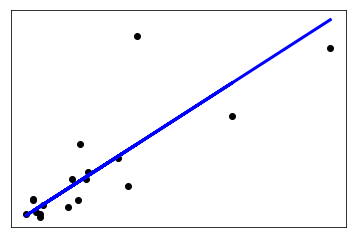

In [23]:
X = spray['SQFT']
Y = spray['Time']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
regr = linear_model.LinearRegression()
X_train = X_train.as_matrix()
X_train = X_train.reshape(-1,1)
regr.fit(X_train, Y_train)
X_test = X_test.as_matrix()
X_test  = X_test.reshape(-1,1)
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

#The coefficients
print('Coefficients: \n', regr.coef_)

# RMSE Train
print(" Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_train, y_pred_train)))

# RMSE Test
print(" Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

# Variances
print('Train Variance score: %.2f' % r2_score(Y_train, y_pred_train))
print('Test Variance score: %.2f' % r2_score(Y_test, y_pred_test))

#Plot training output
plt.scatter(X_train, Y_train, color= 'black')
plt.plot(X_train, y_pred_train, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

# Plot test output
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\Users\mille\Anaconda3\envs\data-x\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


[  8.25   2.     1.     4.5    7.     2.    24.    51.5   37.     9.
   6.    10.   100.5    8.     3.     2.5    9.5   17.75]


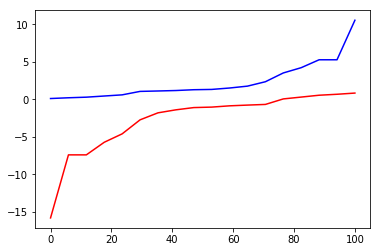

In [42]:
X = spray['SQFT']
Y = spray['Time']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
regr = linear_model.LinearRegression()
X_train = X_train.as_matrix()
X_train = X_train.reshape(-1,1)
regr.fit(X_train, Y_train)
X_test = X_test.as_matrix()
X_test  = X_test.reshape(-1,1)
y_pred_test = regr.predict(X_test)
y_pred_test_baseline = np.full((len(Y_test), 1), np.mean(Y_train))
print(Y_test.as_matrix())
#print(y_pred_test_baseline)
predpr_error = np.max(Y_test.as_matrix() - y_pred_test_baseline,0)/ Y_test
pred_error = np.max(Y_test - y_pred_test, 0)/Y_test
predpr_error = np.sort(predpr_error)
pred_error = np.sort(pred_error)
plt.plot(np.linspace(0,100,len(predpr_error)),predpr_error, color='red')
plt.plot(np.linspace(0,100,len(pred_error)),pred_error, color='blue')

plt.show()

In [72]:
# Ind Variables: Area, Tank/Spray/AWL, Task, SQFT
# Dep Var: Time


frames = [spray['SQFT'], pd.get_dummies(spray['Tank/Spray/AWL']),pd.get_dummies(spray['Area']),
          spray['UPR']]
X = pd.concat(frames, axis=1)
Y = spray['Time']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33)

X_train1 = X_train.drop(columns='UPR')
X_test1 = X_test.drop(columns='UPR')
regr = linear_model.LinearRegression()
regr.fit(X_train1, Y_train)
y_pred_test = regr.predict(X_test1)
y_pred_train = regr.predict(X_train1)

#The coefficients
print('Coefficients: \n', regr.coef_)

# RMSE Train
print(" Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_train, y_pred_train)))

# RMSE Test
print(" Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_pred_test)))

# Variances
print('Train Variance score: %.2f' % r2_score(Y_train, y_pred_train))
print('Test Variance score: %.2f' % r2_score(Y_test, y_pred_test))

Coefficients: 
 [ 2.30153595e-03  1.21181343e-01 -1.77635684e-15 -1.31688289e+00
  1.19570155e+00  3.07698476e+00  0.00000000e+00 -1.12150455e+01
 -1.01734347e+00  5.86127657e+00 -5.11120923e+00  1.10810485e+00
  4.84612825e+00  0.00000000e+00 -8.42262226e+00  0.00000000e+00
  0.00000000e+00 -2.00790696e+00  2.73512442e+00  1.50951080e+00
  4.24800410e+00  1.18538519e+00  3.20360851e+00]
 Train RMSE: 16.04
 Test RMSE: 8.56
Train Variance score: 0.46
Test Variance score: 0.79


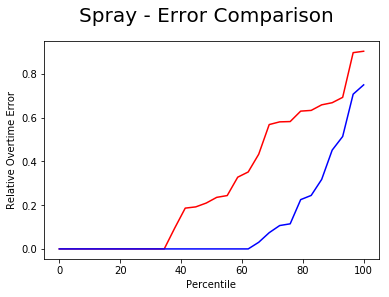

In [75]:
y_predpr = X_test['SQFT']*(1/X_train['UPR'].mean())
Y_val = Y_test
y_pred = y_pred_test
predpr_error = list(map(lambda x : max(x,0), Y_val - y_predpr))/Y_val
pred_error = list(map(lambda x : max(x,0), Y_val - y_pred))/Y_val
predpr_error = np.sort(predpr_error)
pred_error = np.sort(pred_error)
f = plt.figure()
#Their model in RED
plt.plot(np.linspace(0,100,len(predpr_error)),predpr_error, color='red')
#Our model in BLUE
plt.plot(np.linspace(0,100,len(pred_error)),pred_error, color='blue')
f.suptitle('Spray - Error Comparison',fontsize=20, y = 1.0)
plt.xlabel('Percentile')
plt.ylabel('Relative Overtime Error')
plt.show()